## Importação os dados

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

# Ler o arquivo Parquet
df = pd.read_parquet("..\data\dados_sensores_5000.parquet")
df = df.rename(columns={"empresa": "Empresa", "setor": "Setor"})
df.to_csv('..\data\dados_sensores.csv') 
df.head()

,Empresa,energia_kwh,agua_m3,co2_emissoes,Setor
0,Empresa_1,6397.10,296.58,1600.24,Educação
1,Empresa_2,2570.30,492.52,818.98,Saúde
2,Empresa_3,4166.20,158.67,2710.03,Saúde
3,Empresa_4,8781.75,211.74,2036.72,Educação
4,Empresa_5,7846.09,16.84,2179.03,Indústria


## Univariate Data Analysis

In [9]:
df.shape

(5000, 5)

In [10]:
# Obtain a statistics summary
df.describe(include='all')

,empresa,energia_kwh,agua_m3,co2_emissoes,setor
count,5000,5000.000000,5000.000000,5000.000000,5000
unique,5000,NaN,NaN,NaN,6
top,Empresa_5000,NaN,NaN,NaN,Indústria
freq,1,NaN,NaN,NaN,849
mean,NaN,4982.012088,254.591516,1507.816080,NaN
std,NaN,2821.081316,139.225517,849.554449,NaN
min,NaN,100.620000,10.120000,51.120000,NaN
25%,NaN,2581.745000,138.082500,774.130000,NaN
50%,NaN,4936.540000,250.895000,1492.695000,NaN
75%,NaN,7425.097500,373.512500,2258.457500,NaN


## Check null values by column

In [11]:
# Check the number of  null values per variable
print(df.isnull().sum())

empresa         0
energia_kwh     0
agua_m3         0
co2_emissoes    0
setor           0
dtype: int64


In [12]:
df['setor'].value_counts()

setor
Indústria      849
Varejo         848
Saúde          845
Alimentação    841
Serviços       827
Educação       790
Name: count, dtype: int64

## Check duplicated values by column

In [13]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
duplicate_rows

np.int64(0)

## Check types

In [14]:
# Check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empresa       5000 non-null   object 
 1   energia_kwh   5000 non-null   float64
 2   agua_m3       5000 non-null   float64
 3   co2_emissoes  5000 non-null   float64
 4   setor         5000 non-null   object 
dtypes: float64(3), object(2)
memory usage: 195.4+ KB
None


## Univariate Analysis

energia_kwh
Skew : 0.04


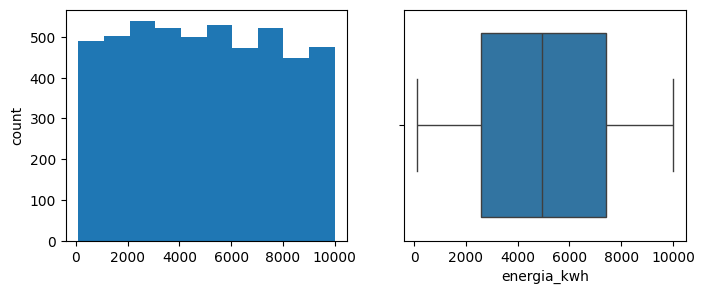

agua_m3
Skew : 0.03


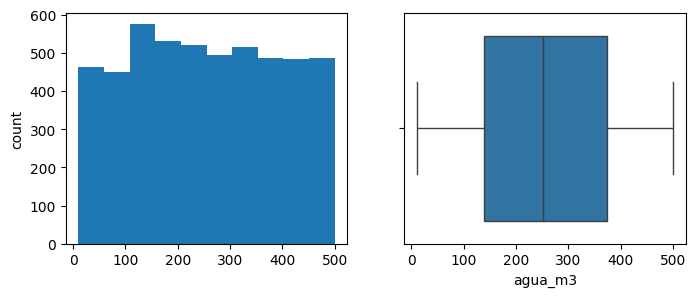

co2_emissoes
Skew : 0.02


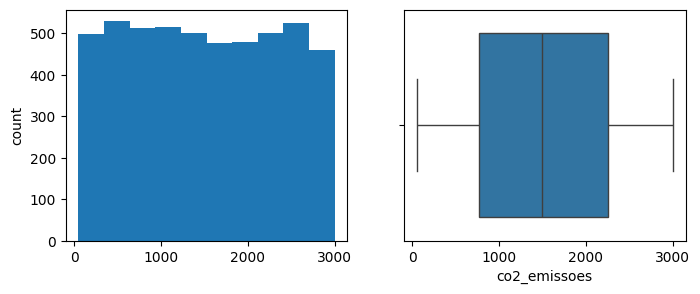

In [22]:
# Univariate analysis
for col in df.columns:
  if col != 'empresa' and col != 'setor':
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    #prepare to plot two graphs
    plt.figure(figsize = (8, 3))
    plt.subplot(1, 2, 1)
    #graph 1
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    #graph 2
    sns.boxplot(x=df[col])
    plt.show()

Tarefa 1: foram feitas a importação e a análise exploratória dos dados. Não foram identificados outliers e nem missing values, portanto, não será necessário o tratamento ou limpeza dos dados.

Tarefa 2: 
-- Ao pesquisar sobre sustentabilidade empresarial, vemos que as métricas podem concentrar-se em algumas vertentes: econômica, ambiental e social. Os dados contidos no datasel da empresa Green Flow podem ser usados para derivar métricas na vertente ambiental. Nesta vertente, alguns indicadores importantes são: pegada carbônica, consumo de água, energia e materiais reciclados, e emissões de CO2.

